In [121]:
import http.client
import json
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt

In [122]:
#if data is in a csv file then jump to 47th cell
#otherwise, jump to 1st cell
#read data from csv file if it exists


if os.path.isfile('monks.csv'):
    df = pd.read_csv('monks.csv')
    print(df)
else:
    df=pd.DataFrame()


    Unnamed: 0      id match_results  home_team  away_team home_team_name  \
0            0  233400           3-2        109         43     Fiorentina   
1            1  233402           1-1        708        113       Atalanta   
2            2  233404           1-2       2930       2714          Inter   
3            3  233406           1-1        522         97      Sampdoria   
4            4  233408           3-1        585        397       Cagliari   
5            5  233410           1-0       1216        102        Palermo   
6            6  233412           0-5        597        613         Napoli   
7            7  233414           3-1       1343       8513        Pescara   
8            8  233416           1-0         89        346        Crotone   
9            9  233418           3-1        625         37       Juventus   
10          10  233419           0-1        397        708         Empoli   
11          11  233420           3-0        113       8513          Milan   

In [123]:
if df.empty:

    AutToken='NFKDUEzEPM3LcVc57jl4RD3xmflyJEoTXSfKlSqc42XzTHcBiwYqKnDflK5O'

    request=requests.get('https://api.sportmonks.com/v3/football/fixtures?include=events;lineups;participants&filters=fixtureLeagues:384', headers={'Authorization': AutToken})
    data=request.json()
    data

## GET MATCHES

In [124]:
if df.empty:

   # Parse the JSON data and create a dataframe
   df = pd.DataFrame.from_dict(data["data"])

   #pop events column
   events = df.pop('events')
   match_results=[]
   events

   match_results=[]
   for match_Events in events:
      results = []
      for event in match_Events:
         if event["type_id"] == 15 or event["type_id"] == 14:
               results.append(event["result"])
      match_results.append(results[-1])



   match_results 
   df["match_results"]=match_results


   home_team_id=[]
   away_team_id=[]
   home_team_name=[]
   away_team_name=[]
   for teams in df["participants"]:
      home_team_id.append(teams[0]["id"])
      away_team_id.append(teams[1]["id"])
      home_team_name.append(teams[0]["name"])
      away_team_name.append(teams[1]["name"])
   df["home_team"]=home_team_id
   df["away_team"]=away_team_id
   df["home_team_name"]=home_team_name
   df["away_team_name"]=away_team_name


   home_team_players_name=[]
   away_team_players_name=[]
   home_team_players_id=[]
   away_team_players_id=[]
   for index,teams in enumerate(df["lineups"]):
      htn=[]
      atn=[]
      hti=[]
      ati=[]
      for player in teams:
         if player["team_id"]==df["home_team"][index]:
               htn.append(player["player_name"])
               hti.append(player["player_id"])
         else:
               atn.append(player["player_name"])
               ati.append(player["player_id"])
      home_team_players_name.append(htn)
      away_team_players_name.append(atn)
      home_team_players_id.append(hti)
      away_team_players_id.append(ati)
   df["home_team_players_name"]=home_team_players_name
   df["home_team_players_id"]=home_team_players_id
   df["away_team_players_name"]=away_team_players_name
   df["away_team_players_id"]=away_team_players_id
   
      ##remove useless columns
   df.pop("lineups")
   df.pop("participants")
   df.pop("venue_id")
   df.pop("starting_at")
   df.pop("leg")
   df.pop("details")
   df.pop("length")
   df.pop("sport_id")
   df.pop("league_id")
   df.pop("season_id")
   df.pop("stage_id")
   df.pop("group_id")
   df.pop("aggregate_id")
   df.pop("round_id")
   df.pop("state_id")
   df.pop("placeholder")
   df.pop("has_odds")
   df.pop("starting_at_timestamp")
   df.pop("name")
   df.pop("result_info")
   df.to_csv("monks.csv")
df


,Unnamed: 0,id,match_results,home_team,away_team,home_team_name,away_team_name,home_team_players_name,away_team_players_name,home_team_players_id,away_team_players_id
0,0,233400,3-2,109,43,Fiorentina,Lazio,"['Sebastien De Maio', 'Carlos Sánchez', 'Matía...","['Thomas Strakosha', 'Wesley Hoedt', 'Patric',...","[62977, 1043, 129605, 404, 129429, 129424, 128...","[129394, 25088, 129706, 61556, 128695, 94760, ..."
1,1,233402,1-1,708,113,Atalanta,Milan,"['Etrit Berisha\xa0', 'Rafael Tolói', 'Bryan C...","['Mattia De Sciglio', 'Gerard Deulofeu', 'Suso...","[129456, 129921, 129467, 128366, 129446, 12781...","[129054, 1057, 4165, 130103, 23905, 129202, 12..."
2,2,233404,1-2,2930,2714,Inter,Sassuolo,"['Samir Handanovic\xa0', 'Marco Andreolli', 'R...","['Alberto Pomini', 'Francesco Magnanelli', 'Lu...","[127929, 128403, 129396, 130198, 128404, 12909...","[129561, 129564, 129563, 127779, 127917, 13016..."
3,3,233406,1-1,522,97,Sampdoria,Chievo,"['Christian Puggioni', 'Lorenco Simic', 'Dodô'...","['Jonathan de Guzmán\xa0', 'Alessandro Gamberi...","[128649, 74099, 129450, 24056, 128853, 129602,...","[986, 128009, 61536, 128599, 4736, 127841, 134..."
4,4,233408,3-1,585,397,Cagliari,Empoli,"['Rafael', 'Mikael Stahre', 'Mauricio Isla', '...","['Maurizio Pugliesi', 'Vincent Laurini', 'Marc...","[129442, 130031, 4097, 128297, 129664, 130106,...","[129744, 129618, 129737, 129842, 129495, 3299,..."
5,5,233410,1-0,1216,102,Palermo,Genoa,"['Josip Posavec', 'Andrea Rispoli', 'Siniša An...","['Santiago Gentiletti', 'Isaac Cofie', 'Giovan...","[73926, 129497, 129539, 129860, 61320, 134009,...","[95462, 128597, 130032, 129858, 128295, 130216..."
6,6,233412,0-5,597,613,Napoli,Torino,"['Rafael', 'Elseid Hysaj', 'Ivan Strinić', 'Em...","['Daniele Padelli', 'Cristian Molinaro', 'Lean...","[129508, 129603, 72811, 1090, 129245, 129500, ...","[128560, 30992, 129196, 77810, 129440, 129665,..."
7,7,233414,3-1,1343,8513,Pescara,Bologna,"['Vincenzo Fiorillo', 'Alessandro Crescenzi', ...","['Angelo Da Costa', 'Marios Ikonomou', 'Emil K...","[129016, 96391, 129400, 130077, 129206, 130067...","[129548, 107930, 129966, 129694, 1391, 129225,..."
8,8,233416,1-0,89,346,Crotone,Udinese,"['Alex Cordaz', 'Claiton', 'Marco Festa', 'Mar...","['Orestis Karnezis', 'Danilo', 'Emmanuel Badu'...","[129499, 129969, 129988, 129951, 129571, 13020...","[107696, 128827, 128574, 129523, 129798, 12982..."
9,9,233418,3-1,625,37,Juventus,Roma,"['Gianluigi Buffon', 'Giorgio Chiellini', 'Med...","['Wojciech Szczesny', 'Antonio Rüdiger', 'Juan...","[127688, 127693, 32239, 94511, 4233, 128005, 1...","[805, 31837, 129175, 128545, 129419, 95131, 12..."


## stadardize, and plot


In [131]:
#create a standardized dictionary with ids in order 
teams_id={}
for teams in df["home_team"]:
   if teams not in teams_id:
      teams_id[teams]=len(teams_id)
for teams in df["away_team"]:
   if teams not in teams_id:
      teams_id[teams]=len(teams_id)
teams_id

{109: 0,
 708: 1,
 2930: 2,
 522: 3,
 585: 4,
 1216: 5,
 597: 6,
 1343: 7,
 89: 8,
 625: 9,
 397: 10,
 113: 11,
 2714: 12,
 43: 13,
 97: 14,
 346: 15,
 102: 16,
 8513: 17,
 613: 18,
 37: 19}

id               233400
match_results       3-2
home_team           109
away_team            43
Name: 0, dtype: object
id               233402
match_results       1-1
home_team           708
away_team           113
Name: 1, dtype: object
id               233404
match_results       1-2
home_team          2930
away_team          2714
Name: 2, dtype: object
id               233406
match_results       1-1
home_team           522
away_team            97
Name: 3, dtype: object
id               233408
match_results       3-1
home_team           585
away_team           397
Name: 4, dtype: object
id               233410
match_results       1-0
home_team          1216
away_team           102
Name: 5, dtype: object
id               233412
match_results       0-5
home_team           597
away_team           613
Name: 6, dtype: object
id               233414
match_results       3-1
home_team          1343
away_team          8513
Name: 7, dtype: object
id               233416
match_results       1-0


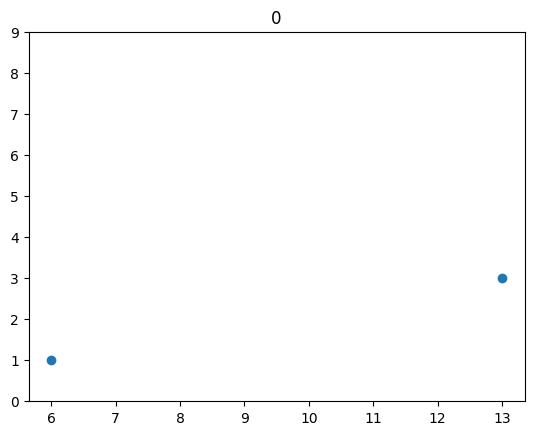

13
{0: 2, 2: 1, 8: 1}


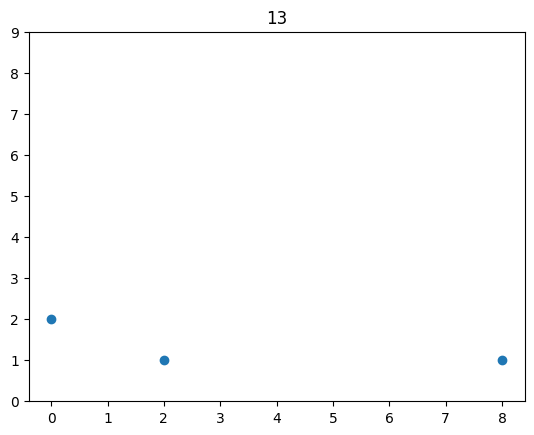

1
{11: 1, 10: 1, 14: 1}


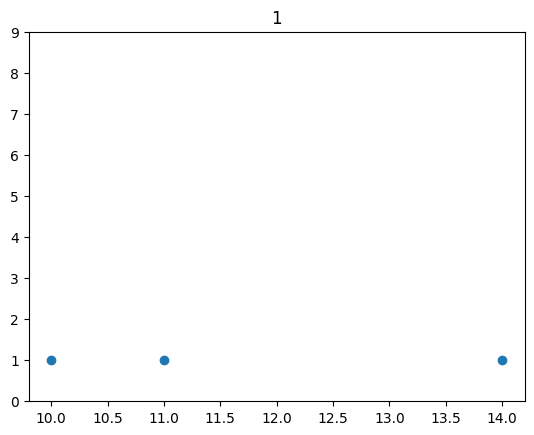

11
{1: 1, 17: 3}


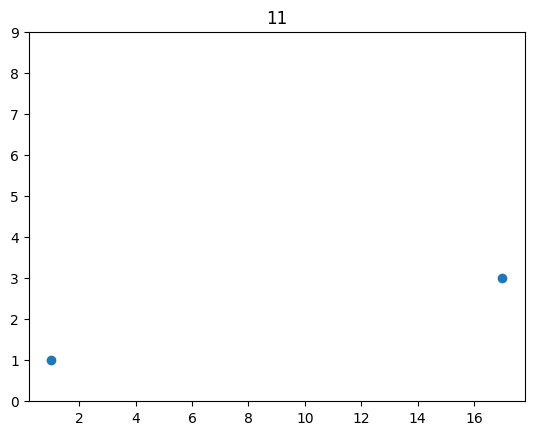

2
{12: 1, 13: 1}


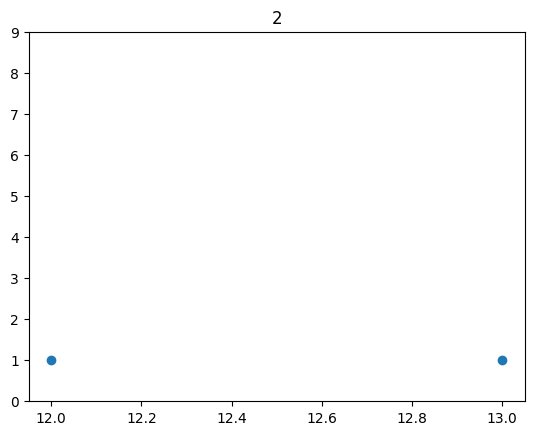

12
{2: 2, 4: 5}


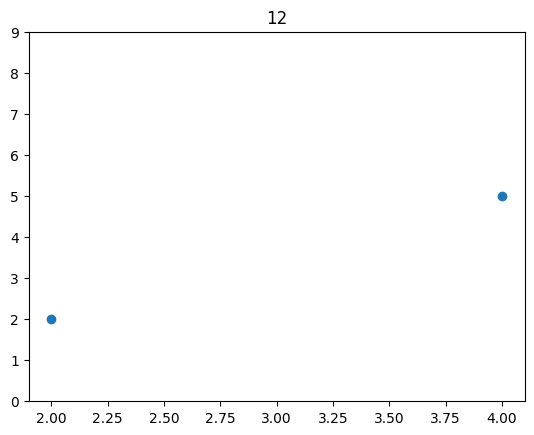

3
{14: 1, 15: 0}


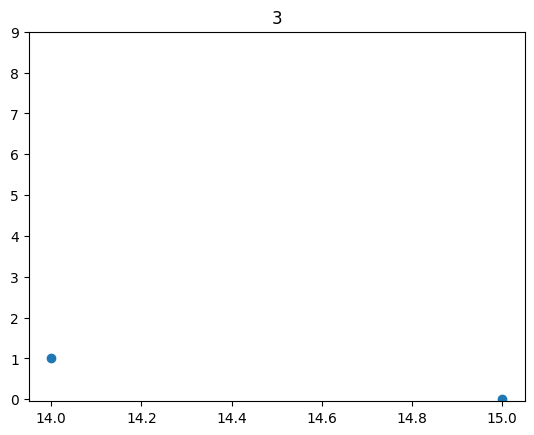

14
{3: 1, 19: 3, 1: 0}


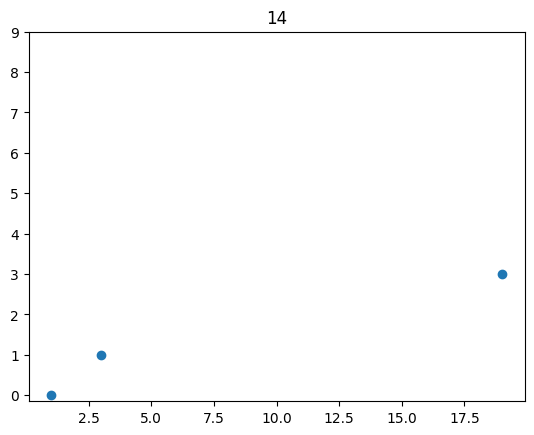

4
{10: 3, 12: 2}


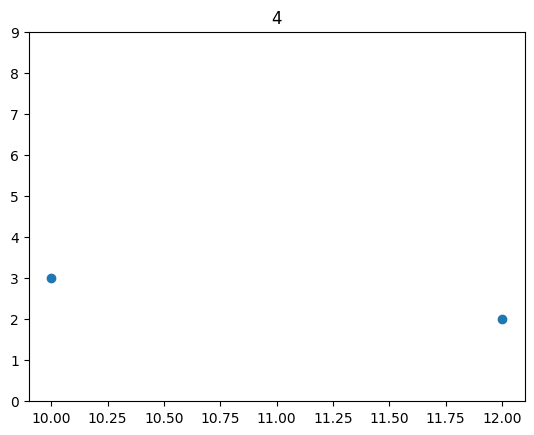

10
{4: 1, 1: 0, 5: 1}


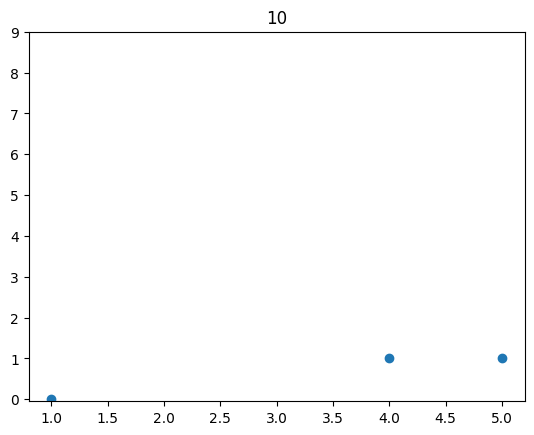

5
{16: 1, 7: 0, 10: 2}


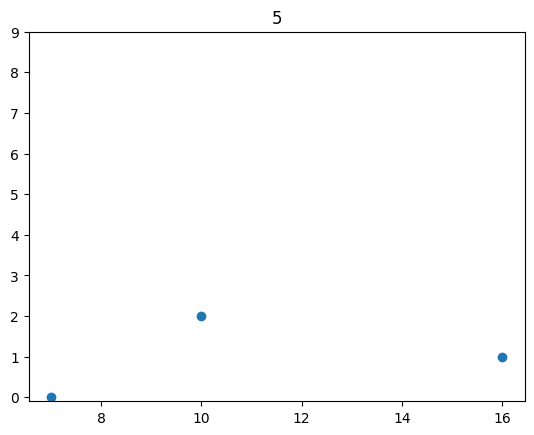

16
{5: 0, 18: 2, 19: 1}


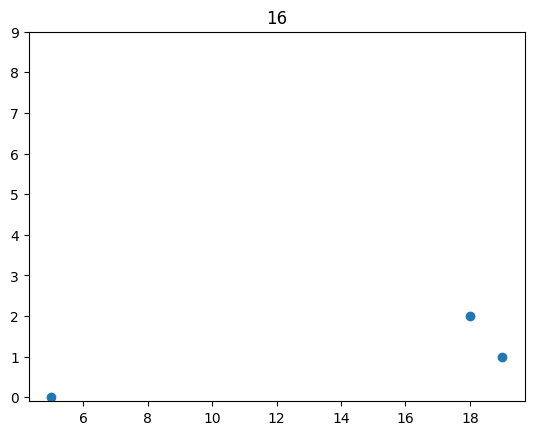

6
{18: 0, 0: 4}


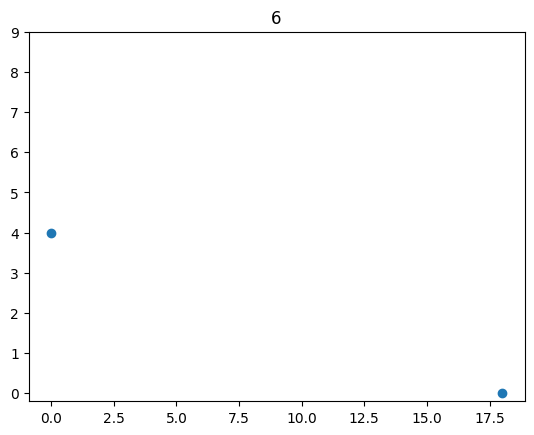

18
{6: 5, 16: 1}


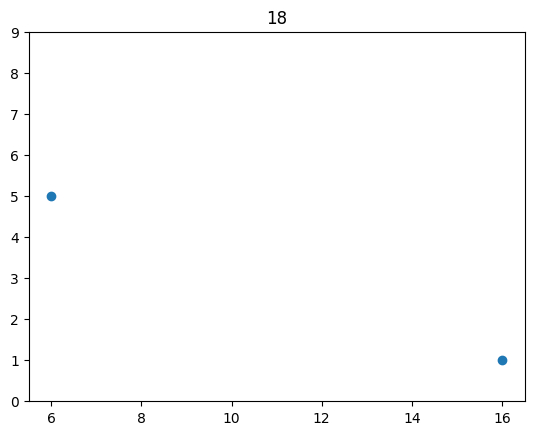

7
{17: 3, 5: 2}


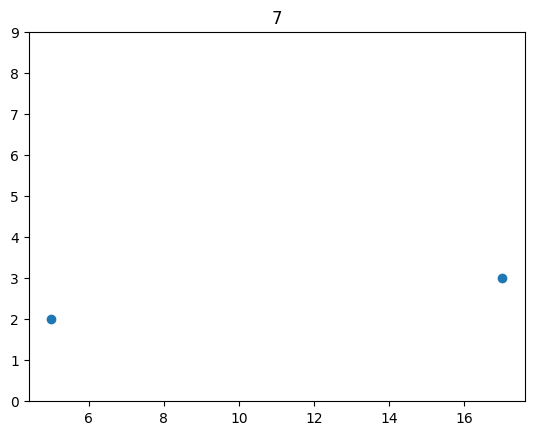

17
{7: 1, 11: 0, 9: 1}


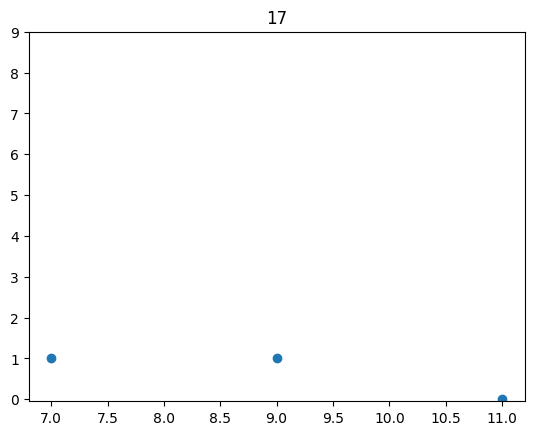

8
{15: 1, 9: 3, 13: 3}


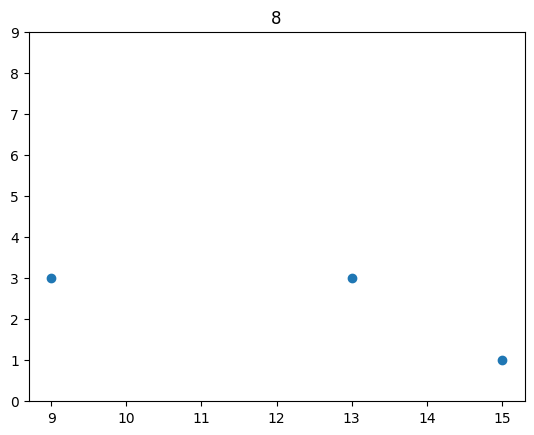

15
{8: 0, 3: 1}


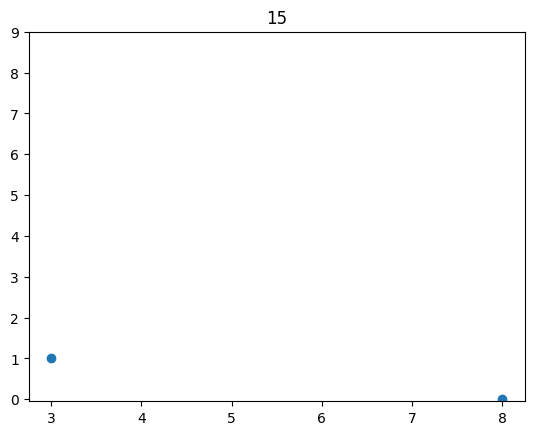

9
{19: 3, 8: 0, 17: 2}


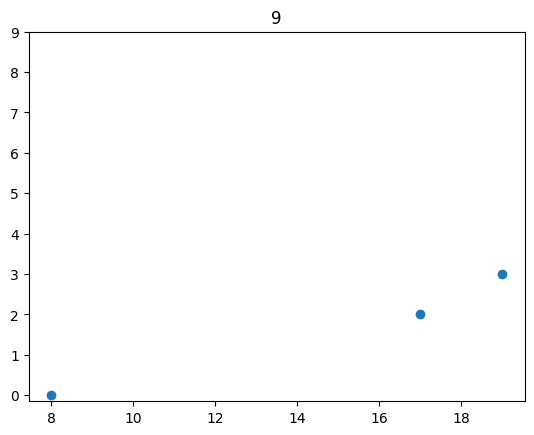

19
{9: 1, 14: 5, 16: 1}


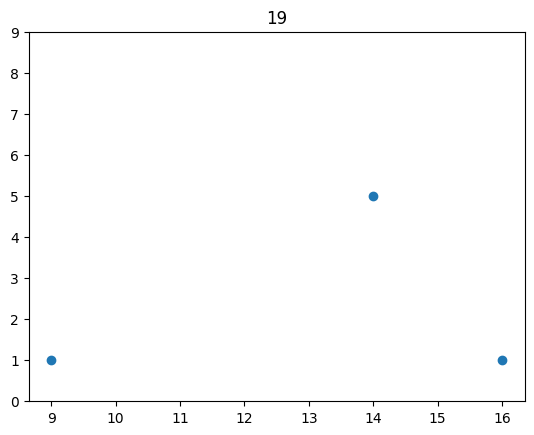

In [134]:
plot_data=df[["id","match_results","home_team","away_team"]]
teams_goals={}
for index, row in plot_data.iterrows():
    print(row)
    if teams_id[row["home_team"]] not in teams_goals:
        teams_goals[teams_id[row["home_team"]]]={}
    if teams_id[row["away_team"]] not in teams_goals:
        teams_goals[teams_id[row["away_team"]]]={}
    home_goals,away_goals=row["match_results"].split("-")
    home_goals=int(home_goals)
    away_goals=int(away_goals)
    if teams_goals[teams_id[row["home_team"]]].get(teams_id[row["away_team"]]) is None:
        teams_goals[teams_id[row["home_team"]]][teams_id[row["away_team"]]]=home_goals
    else:
        teams_goals[teams_id[row["home_team"]]][teams_id[row["away_team"]]]+=home_goals
    if teams_goals[teams_id[row["away_team"]]].get(teams_id[row["home_team"]]) is None:
        teams_goals[teams_id[row["away_team"]]][teams_id[row["home_team"]]]=away_goals
    else:
        teams_goals[teams_id[row["away_team"]]][teams_id[row["home_team"]]]+=away_goals

#plot_data new imae for each team

#pot the matrix ogngoals of each team against each other
#teams_goals

'''

for team in teams_goals:
    print(team)
    print(teams_goals[team])
    plt.scatter(teams_goals[team].keys(),teams_goals[team].values())
    plt.yticks(range(0,10,1))
    plt.title(team)
    plt.show()
    '''
        

    
